In [23]:
import re
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
import pandas as pd 
import pandas as pd # 판다스형태로 csv 읽어야해서. 
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora

#영화는 주토피아로 고정
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=130850&type=after&onlyActualPointYn=N&onlySpoilerPointYn=N&order=sympathyScore&page={}'

res = requests.get(url)
index = 1
user_dic = {}
if res.status_code == 200:
    soup=BeautifulSoup(res.text,'lxml')
    total = soup.select('div.score_total > strong > em')[0].text
    pages = int(total.replace(',','')[:-1]) #17,921 > 17921로 변환 후 캐스팅

#####이 코드 말고 아래 코드 사용#######

comments = [] #리뷰
stars = [] #평점
res = requests.get(url)
if res.status_code == 200:
    soup=BeautifulSoup(res.text,'lxml')
    star =  soup.select('div.score_result > ul > li > div.star_score > em')
    tds = soup.select('div.score_result > ul > li > div.score_reple > p > span')
    for st in star:
        stars.append(int(st.text))
    for cmt in tds:
        if cmt.text != '관람객' and cmt.text !='스포일러가 포함된 감상평입니다. 감상평 보기':
            comments.append(cmt.text)
    if(len(comments) != len(stars)): #한 페이지에서 리뷰개수와, 별점개수가 같은지 확인
        print(url)

# 리뷰 앞뒤로 쓸데없는 공백을 제거하는 함수
def no_space(text):
    text1 = re.sub('&nbsp;|&nbsp;|\n|\t|\r', '', text)
    text2 = re.sub('\n\n','', text1)
    return text2

comments = []
stars = []
res = requests.get(url)
if res.status_code == 200:
    soup=BeautifulSoup(res.text,'lxml')
    star =  soup.select('div.score_result > ul > li > div.star_score > em')
    tds = soup.select('div.score_result > ul > li > div.score_reple > p > span')
    for st in star:
        stars.append(int(st.text))
    for cmt in tds:
        if cmt.text != '관람객' and cmt.text !='스포일러가 포함된 감상평입니다. 감상평 보기':
            comments.append(no_space(cmt.text))  #####여기에 추가됨
    if(len(comments) != len(stars)):
        print(url)

base_url = url
comments = []
stars = []
for page in tqdm(range(1,pages+1)):
    url = base_url.format(page)
    if res.status_code == 200:
        soup=BeautifulSoup(res.text,'lxml')
        star =  soup.select('div.score_result > ul > li > div.star_score > em')
        tds = soup.select('div.score_result > ul > li > div.score_reple > p > span')
        for st in star:
            stars.append(int(st.text))
        for cmt in tds:
            if cmt.text != '관람객' and cmt.text !='스포일러가 포함된 감상평입니다. 감상평 보기':
                comments.append(no_space(cmt.text))
        if(len(comments) != len(stars)):
            print(url)
            break

df = pd.DataFrame({"Review":comments, "Rank":stars})
df.to_csv('./review.csv' , index= False) #파일경로


#train_df를 리스트 형태로 바꿈
train_df = list(df['Review'].values)

100%|██████████| 1793/1793 [00:22<00:00, 80.28it/s]


In [24]:
# 전달 불용어 리스트
f = open("./stopword2.txt","r")
stoplist=f.readlines()
for i in range(len(stoplist)):
       stoplist[i] = stoplist[i].replace("\n", "")
       stoplist[i] = stoplist[i].replace(",", "")
       stoplist[i] = stoplist[i].replace(" ", "")

In [25]:
# 불용어 처리
texts = [[word for word in document.split() if word not in stoplist]
        for document in train_df]

In [26]:
# 단어사전 만들기
dictionary = corpora.Dictionary(texts)                    # 사전 생성 (토큰화)
print(dictionary)

Dictionary(102 unique tokens: ['그외에도', '너무멋있었습니다', '너무재밌게봤고', '네..', '닉한테']...)


In [27]:
# 단어사전이 잘 만들어졌나? 확인용
for i in dictionary.items():
        print(i)

(0, '그외에도')
(1, '너무멋있었습니다')
(2, '너무재밌게봤고')
(3, '네..')
(4, '닉한테')
(5, '다시봐도재밌을것같은영화에요')
(6, '많이추천할게요')
(7, '무슨내가')
(8, '반했어요')
(9, '설레냐ㅠㅜㅠ')
(10, '아니')
(11, '여우가')
(12, '영화에나오는')
(13, '정말')
(14, '진심')
(15, '캐릭터들이')
(16, '캐릭터한테')
(17, '하나같이귀여웠고')
(18, '후회하지않...')
(19, '2016년')
(20, '강동원과')
(21, '닉.')
(22, '단언컨대')
(23, '버디')
(24, '상반기')
(25, '영화')
(26, '주디와')
(27, '최고의')
(28, '플레이는')
(29, '황정민이')
(30, '..나무늘보')
(31, 'ㅋㅋ')
(32, '귀엽네')
(33, '졸')
(34, '하')
(35, '겁나')
(36, '너무')
(37, '묻히기엔')
(38, '보인다고')
(39, '아쉬운')
(40, '애니메이션')
(41, '영화.')
(42, '영화처럼')
(43, '유치한')
(44, '재밌는데?!')
(45, '가능으로')
(46, '날려버리고')
(47, '러닝타임')
(48, '만드는')
(49, '많은걸')
(50, '보니')
(51, '보여주기에는')
(52, '불가능을')
(53, '선입견을')
(54, '애니메이션한편으로는')
(55, '짧은')
(56, '추격전이다')
(57, '미치겠네..')
(58, '반하냐...')
(59, '여우한테')
(60, '이젠')
(61, '하다하다')
(62, '꼭')
(63, '나왔음')
(64, '너무너무')
(65, '재밌네요..2편도')
(66, '좋겠어요.')
(67, '겉모습으로')
(68, '능력을')
(69, '마라')
(70, '판단하지')
(71, 'ㅎㅎ')
(72, '귀여워요')
(73, '주디가')
(74, '감이')
(75, '끝판왕')
(76, '닉은')
(77, 

In [28]:
corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

corpus : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)], [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(36, 1), (39, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(67, 1), (68, 1), (69, 1), (70, 1)], [(36, 1), (71, 1), (72, 1), (73, 1)], [(74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), 

(0, '0.030*"설득력있게" + 0.030*"어떻게" + 0.030*"케미가" + 0.030*"줄은.." + 0.030*"동물들이" + 0.030*"토끼와" + 0.030*"좋을" + 0.030*"끝판왕" + 0.030*"디자인도..." + 0.030*"살아가는지를"')
(1, '0.111*"너무" + 0.055*"아쉬운" + 0.055*"귀여워요" + 0.055*"주디가" + 0.055*"ㅎㅎ" + 0.055*"선입견을" + 0.055*"보여주기에는" + 0.055*"만드는" + 0.055*"날려버리고" + 0.055*"많은걸"')
(2, '0.048*"유치한" + 0.048*"보인다고" + 0.048*"영화처럼" + 0.048*"묻히기엔" + 0.048*"애니메이션" + 0.048*"영화." + 0.048*"겁나" + 0.048*"재밌는데?!" + 0.048*"아쉬운" + 0.048*"플레이는"')
(3, '0.100*"진심" + 0.050*"무슨내가" + 0.050*"네.." + 0.050*"설레냐ㅠㅜㅠ" + 0.050*"여우가" + 0.050*"영화에나오는" + 0.050*"하나같이귀여웠고" + 0.050*"그외에도" + 0.050*"다시봐도재밌을것같은영화에요" + 0.050*"아니"')
(4, '0.071*"나왔음" + 0.071*"재밌네요..2편도" + 0.071*"꼭" + 0.071*"좋겠어요." + 0.071*"너무너무" + 0.071*"마라" + 0.071*"능력을" + 0.071*"판단하지" + 0.071*"하다하다" + 0.071*"이젠"')


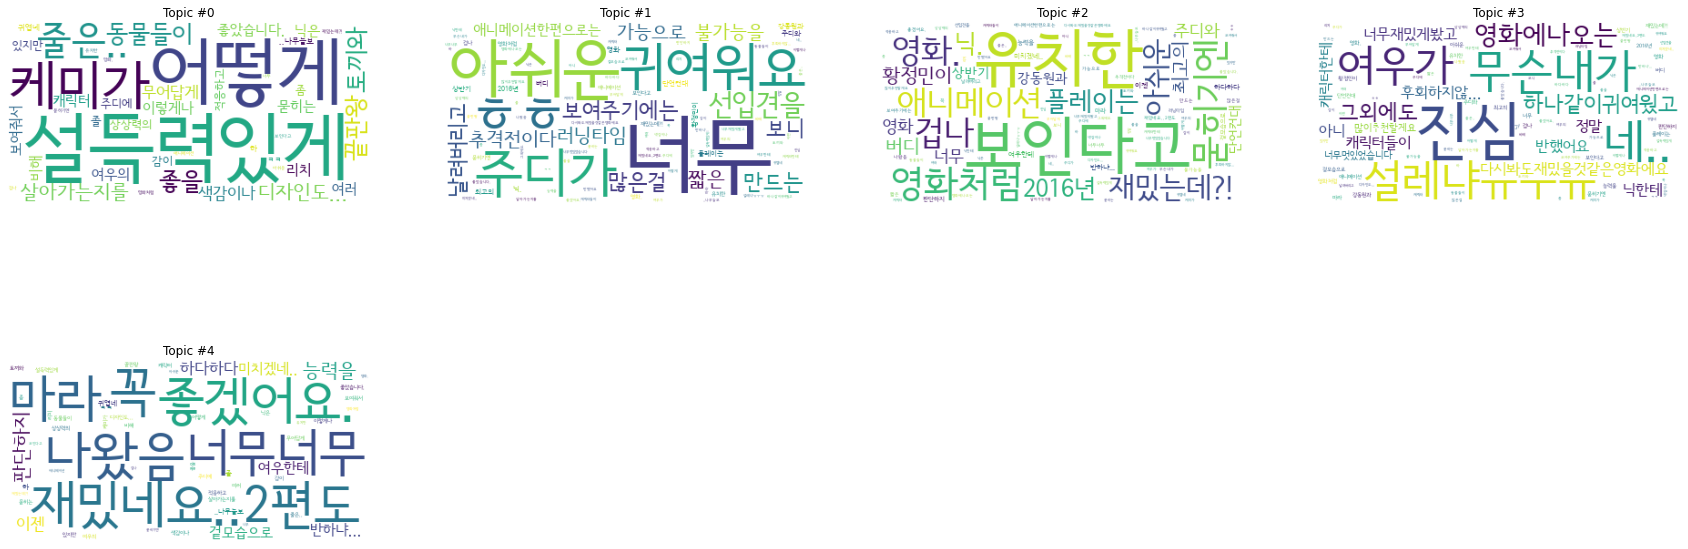

In [29]:
#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=5, random_state = 1)                   # 모델구축

for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
   print(t)

#-----------------------------------------------------------------
wc = WordCloud(background_color='white',
        font_path='./SeoulNamsanM.ttf')            # 워드클라우드

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('./LDA_wordcloud.png', bbox_inches='tight')     # 이미지 저장